# Assignment Netwerkanalyse

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: alleen de hoofdletter (dus voor de groep van Marx zou je `A` kiezen)

__Namen__:Anoniem
__Emails__:Anoniem
__Student id__:Anoniem
__Groep__:Anoniem

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Week 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import networkx as nx
import requests
from nose.tools import assert_equal, assert_count_equal
from itertools import combinations
from collections import defaultdict

In [2]:
range?

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import networkx as nx
import requests
# from nose.tools import assert_equal, assert_count_equal, mijn nose doet raar
from itertools import combinations
from collections import defaultdict

# Deel -1

* Verzamelingen
    * Maak alle opgaven op [deze site](https://set.kuleuven.be/voorkennis/zomercursus/zomercursusZ/logica/verzamelingen_light). Dus ook die in sectie 2.1 en 2.1.1! 
    
  Gedaan

# Deel 0: First Course Chap 1

*  First Course Chap 1, alle overige opgaven (dus vanaf 22) (plus opnieuw die je vorige week fout had)

13. Because the network is only complete when all nodes of one groep are connected to all of the nodes of the other group, which means the max number of edges is N1 * N2
14. A 
15. Because its nnot stated if nodes have multiple edges, not all networks have to be complete 
16. D 
17. 6 nodes, 10 links, no self loops 
18. Yes, F, no 
19. C 
20. 0,5

# Deel 1: MacBeth

In [4]:
def open_graph():
    """Loads the graphml"""
    if 'macbethcorrected.graphml' in os.listdir():
        return nx.read_graphml('macbethcorrected.graphml')
    elif os.path.exists('../../data/Week2'):
        return nx.read_graphml('../../data/Week2/macbethcorrected.graphml')
    elif os.path.exists('../../../data/Week2'):
        return nx.read_graphml('../../../data/Week2/macbethcorrected.graphml')

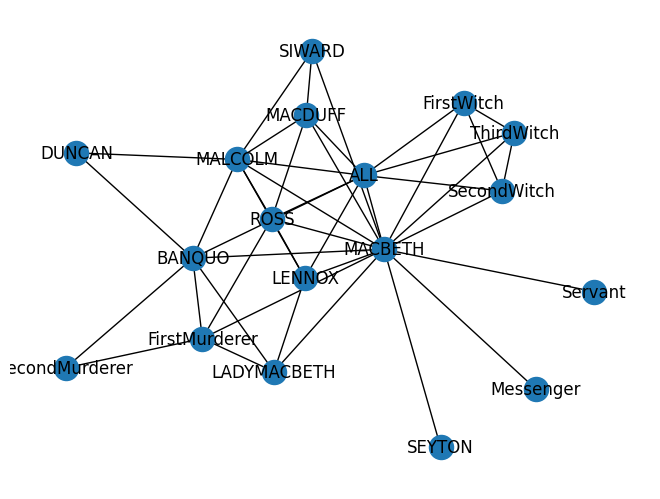

In [5]:
MacB = open_graph()
nx.draw(MacB, with_labels=True)

## Vraag 1
 
In deze vraag gaan we kijken naar de vorm van deelgrafen in MacB. We vragen ons voor elke hoeveelheid knopen af, hoeveel verschillende "vormen" deelnetwerken met zoveel knopen er in MacB zitten.

Voorbeeld: met 2 knopen hebben we ook 2 "vormen" in MacB, namelijk de twee knopen onverbonden, en de twee knopen verbonden. Met drie knopen zijn er meer mogelijkheden (vogel ze zelf uit), en het is de vraag of we die ook allemaal terugzien in MacB. 

Alle deelnetwerken van dezelfde vorm noemen we isomorf. 

Geef voor `n in range(5)` het aantal niet isomorfe deelnetwerken in MacB met `n` knopen als een dict met het aantal knopen als sleutel en het aantal niet isomorfe deelnetwerken als waarde. 

**Hint:** teken voor elk aantal knopen eerst zelf alle mogelijke niet isomorfe netwerkjes die je met zoveel knopen kunt maken, en ga dan op zoek in de Macbeth graaf of je die allemaal kunt vinden.  Voor $n=2$ zijn er 2 mogelijke niet isomorfe netwerkjes: $\langle\{1,2\},\emptyset\rangle$ en $\langle\{1,2\},\{(1,2)\}\rangle$.

**Tip:** Je mag dit natuurlijk programmeren, maar het hoeft niet. 


In [6]:
iso_types = {
    0: 0, # kan niet
    1: 18, # alle knopen
    2: 2,
    3: 6,
    4: 0
}

# test
iso_types
MacB.edges()

EdgeView([('MACBETH', 'FirstWitch'), ('MACBETH', 'SecondWitch'), ('MACBETH', 'ThirdWitch'), ('MACBETH', 'ALL'), ('MACBETH', 'MALCOLM'), ('MACBETH', 'LENNOX'), ('MACBETH', 'ROSS'), ('MACBETH', 'BANQUO'), ('MACBETH', 'LADYMACBETH'), ('MACBETH', 'Messenger'), ('MACBETH', 'MACDUFF'), ('MACBETH', 'FirstMurderer'), ('MACBETH', 'Servant'), ('MACBETH', 'SEYTON'), ('MACBETH', 'SIWARD'), ('LADYMACBETH', 'LENNOX'), ('LADYMACBETH', 'BANQUO'), ('LADYMACBETH', 'FirstMurderer'), ('MACDUFF', 'ALL'), ('MACDUFF', 'MALCOLM'), ('MACDUFF', 'ROSS'), ('MACDUFF', 'SIWARD'), ('MALCOLM', 'ALL'), ('MALCOLM', 'DUNCAN'), ('MALCOLM', 'LENNOX'), ('MALCOLM', 'ROSS'), ('MALCOLM', 'BANQUO'), ('MALCOLM', 'SIWARD'), ('ROSS', 'ALL'), ('ROSS', 'LENNOX'), ('ROSS', 'FirstMurderer'), ('BANQUO', 'ALL'), ('BANQUO', 'DUNCAN'), ('BANQUO', 'FirstMurderer'), ('BANQUO', 'SecondMurderer'), ('FirstWitch', 'SecondWitch'), ('FirstWitch', 'ThirdWitch'), ('FirstWitch', 'ALL'), ('LENNOX', 'ALL'), ('FirstMurderer', 'SecondMurderer'), ('Seco

In [7]:
assert_equal(type(iso_types), dict)
assert_equal(len(iso_types),5)
assert_equal(set(iso_types.keys()),set(range(5)))

for n in iso_types:
    assert isinstance(iso_types[n], int)

## Vraag 2
Bereken voor ieder personage zijn "degree" en zijn "neighbour set". Stop dit in een dictionary genaamd `personage_dict` waar de key het personage is en de value een tuple (een paar in dit geval)  met eerst de degree en dan de neighbour set in de vorm van een lijst.

* Voorbeeld:
`{FirstWitch: (4, ['ALL', 'ThirdWitch', 'MACBETH', 'SecondWitch'])...}`
* Hint: gebruik weer een dict comprehensie. Dit kan in 1 regel.

In [8]:
personage_dict = {person: # selected person
                   (MacB.degree(person), # get the degree
                   list(MacB.neighbors(person))) # get the list of neigbors
                  for person in MacB.nodes()} # for all person

len(personage_dict), personage_dict['MACBETH']

personage_dict

{'MACBETH': (15,
  ['FirstWitch',
   'SecondWitch',
   'ThirdWitch',
   'ALL',
   'MALCOLM',
   'LENNOX',
   'ROSS',
   'BANQUO',
   'LADYMACBETH',
   'Messenger',
   'MACDUFF',
   'FirstMurderer',
   'Servant',
   'SEYTON',
   'SIWARD']),
 'LADYMACBETH': (4, ['MACBETH', 'LENNOX', 'BANQUO', 'FirstMurderer']),
 'MACDUFF': (5, ['MACBETH', 'ALL', 'MALCOLM', 'ROSS', 'SIWARD']),
 'MALCOLM': (8,
  ['MACBETH',
   'MACDUFF',
   'ALL',
   'DUNCAN',
   'LENNOX',
   'ROSS',
   'BANQUO',
   'SIWARD']),
 'ROSS': (6,
  ['MACBETH', 'MACDUFF', 'MALCOLM', 'ALL', 'LENNOX', 'FirstMurderer']),
 'BANQUO': (7,
  ['MACBETH',
   'LADYMACBETH',
   'MALCOLM',
   'ALL',
   'DUNCAN',
   'FirstMurderer',
   'SecondMurderer']),
 'FirstWitch': (4, ['MACBETH', 'SecondWitch', 'ThirdWitch', 'ALL']),
 'LENNOX': (5, ['MACBETH', 'LADYMACBETH', 'MALCOLM', 'ROSS', 'ALL']),
 'FirstMurderer': (5,
  ['MACBETH', 'LADYMACBETH', 'ROSS', 'BANQUO', 'SecondMurderer']),
 'DUNCAN': (2, ['MALCOLM', 'BANQUO']),
 'SecondWitch': (4, ['MAC

In [9]:
assert_equal(type(personage_dict), dict)
assert_equal(type(list(personage_dict.values())[0]), tuple)
assert_equal(type(list(personage_dict.values())[0][0]), int)
assert_equal(type(list(personage_dict.values())[0][1]), list)
assert_equal(type(list(personage_dict.values())[0][1][0]), str)


## Vraag 3
Maak de lijst met alle maximale cliques **die (strict) meer dan 3 knopen bevatten** in de Macbeth graaf.

Geef een maximale clique weer als een lijst van de knopen (dus een lijst in een lijst). Noem deze `cliques`

Zorg dat alle lijsten alfabetisch gesorteerd zijn, ook de buitenste lijst. Dus je krijgt:

```
[['ALL', 'BANQUO', 'MACBETH', 'MALCOLM'],
 ['ALL', 'FirstWitch', 'MACBETH', 'SecondWitch', 'ThirdWitch'],
 ['ALL', 'LENNOX', 'MACBETH', 'MALCOLM', 'ROSS'],
 ....]
 ```

* Hint: gebruik `sorted` om te sorteren en natuurlijk doe je dit met een list comprehensie. 1 regel is genoeg.
* HINT: bedenk wat een maximale kliek in een netwerk is. (het driehoek netwerk heeft dus maar 1 maximale kliek, zichzelf, ook al zitten er meerdere klieks in (alle paartjes zijn ook klieks bijvoorbeeld))

In [10]:
# nx.find_cliques(MacB) find all cliques
# sorted([sorted(clique), sorts the "inner" and "outer" lists
# if len(clique) > 3 only adds it to the clique's list if its shorter than 3.
cliques = sorted([sorted(clique) for clique in nx.find_cliques(MacB)])

cliques

[['ALL', 'BANQUO', 'MACBETH', 'MALCOLM'],
 ['ALL', 'FirstWitch', 'MACBETH', 'SecondWitch', 'ThirdWitch'],
 ['ALL', 'LENNOX', 'MACBETH', 'MALCOLM', 'ROSS'],
 ['ALL', 'MACBETH', 'MACDUFF', 'MALCOLM', 'ROSS'],
 ['BANQUO', 'DUNCAN', 'MALCOLM'],
 ['BANQUO', 'FirstMurderer', 'LADYMACBETH', 'MACBETH'],
 ['BANQUO', 'FirstMurderer', 'SecondMurderer'],
 ['FirstMurderer', 'MACBETH', 'ROSS'],
 ['LADYMACBETH', 'LENNOX', 'MACBETH'],
 ['MACBETH', 'MACDUFF', 'MALCOLM', 'SIWARD'],
 ['MACBETH', 'Messenger'],
 ['MACBETH', 'SEYTON'],
 ['MACBETH', 'Servant']]

In [11]:
assert_equal(type(cliques), list)
assert_equal(type(cliques[0]), list)
# elk element in zo'n kliek is een knoop
for L in cliques:
    for n in L:
        assert_equal(n in MacB,True,msg= 'elk element in zon kliek is een knoop')     

## Vraag 4
 
  
Hoeveel  deelnetwerken  in het MacBeth netwerk hebben een dichtheid (_density_) van 1?

Hint: kijk eens wat er gebeurt als je `nx.density` gebruikt op subgraven van verschillende lengtes.

In [12]:
# deelnetwerken = sum(nx.density(MacB.subgraph(clique)) == 1 for clique in nx.find_cliques(MacB))

deelnetwerken = len([nodes for nodes in # loop through nodes
                     nx.enumerate_all_cliques(MacB) if # from all of the cliques
                     nx.density(MacB.subgraph(nodes)) == 1]) # check if the density == 1. then add is.

deelnetwerken

# for clique in nx.find_cliques(MacB):
#     print(clique)


103

In [13]:
assert isinstance(deelnetwerken,int), "We vragen om een geheel getal."

# Deel 2: Easley and Kleinberg

## Vraag 5
Maak opdracht [3.7.1 van Easley and Kleinberg](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch03.pdf). 
Geef je antwoord in de cell hieronder

De kans om vrienden te worden met de vriend van een vriend.

## Vraag 6
Maak opdracht [3.7.2 van Easley and Kleinberg](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch03.pdf).

Geef het antwoord als `'S'` of `'W'` aan de variabele `a`

In [14]:
a = 'W'
a

'W'

In [15]:
assert_equal(a == 'W' or a == 'S', True)


## Vraag 7
Maak opdracht [3.7.3 van Easley and Kleinberg](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch03.pdf).

Geef alle nodes die voldoen in hoofdletters, als lijst van strings aan variabele `b`.

Voorbeeld: `x = ['A', 'B'...]`

In [16]:
b = ['A', 'B', 'D']
b

['A', 'B', 'D']

In [17]:
assert_equal(type(b), list)
for x in b:
    if x not in ['A', 'B', 'C', 'D', 'E']:
        raise AssertionError("Een van de knopen in je lijst bestaat niet")


## Vraag 8
Maak opdracht [3.7.4 van Easley and Kleinberg](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch03.pdf).

Geef alle nodes die niet voldoen in hoofdletters, als lijst van strings aan variabele `c`.

Voorbeeld: `x = ['A', 'B']`

In [18]:
c = ['C', 'E']

#WRITE YOUR CODE HERE
c

['C', 'E']

In [19]:
assert_equal(type(c), list)
for x in c:
    if x not in ['A', 'B', 'C', 'D', 'E']:
        raise AssertionError("Een van de knopen in je lijst bestaat niet")


## Vraag 9
Maak opdracht [3.7.5 van Easley and Kleinberg](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch03.pdf).

Geef alle nodes die voldoen in hoofdletters, als lijst van strings aan variabele `d`.

Voorbeeld: `x = ['A', 'B'...]`

In [20]:
d = ['A', 'B', 'C']

d

['A', 'B', 'C']

In [21]:
assert_equal(type(d), list)
for x in d:
    if x not in ['A', 'B', 'C', 'D', 'E']:
        raise AssertionError("Een van de knopen in je lijst bestaat niet")


# Deel 3: Strong Triadic Closure

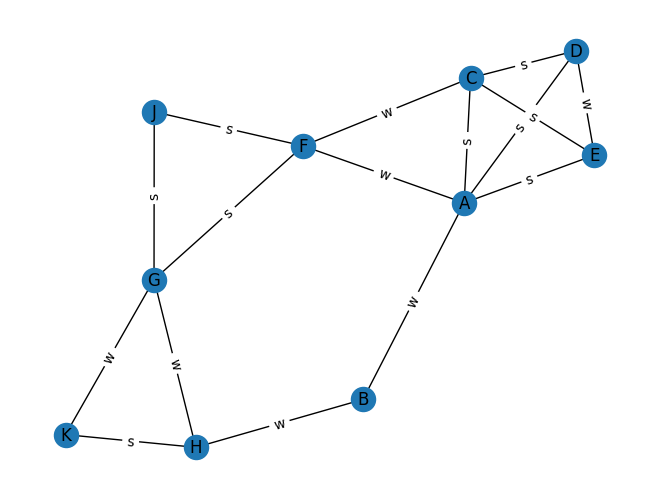

In [22]:
# Hier staat een netwerk waarmee je je code kunt testen
# Je kunt ook zelf dingen veranderen in deze cel

G = nx.Graph()
G.add_edges_from([('D', 'E'), ('C', 'F'), ('A', 'F'), ('G', 'K'), ('G', 'H'),
                  ('H', 'B'), ('A', 'B')],
                 tie='w')
G.add_edges_from([('D', 'C'), ('D', 'A'), ('C', 'A'), ('E', 'A'), ('E', 'C'),
                  ('F', 'J'), ('F', 'G'), ('J', 'G'), ('K', 'H')],
                 tie='s')

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
my_edge_labels = {(u,v,): d['tie']
                   for u, v, d in G.edges(data=True)
                 }

nx.draw_networkx_edge_labels(G, pos, edge_labels=my_edge_labels);

## Vraag 10

Schrijf de Python functie `STC_node(G, n)` die voor een knoop `n` in een willekeurige invoer  graaf `G`, met sterke en zwakke relaties zoals hierboven, uitzoekt of die knoop voldoet aan Strong Triadic Closure.

* Als node `n` voldoet aan de Strong Triadic Closure eigenschap return dan de lege verzameling.
* Zo niet geef dan de verzameling van alle driehoeken waarvan `n` 1 van de knopen is en die niet voldoen aan de STC eigenschap. 
    * De verzameling heeft de vorm `{frozenset({'A', 'C', 'D'}), frozenset({'A', 'E', 'D'})}`. 
        * **waarbij `{'A', 'C', 'D'}` een `frozenset` is**
        * Die maak je heel makkelijk met `frozenset(('A', 'C', 'D'))`
        * Je moet frozensets gebruiken omdat verzamelingen geen immutables mogen bevatten
    *  Dus de "ongesloten driehoekjes" representeren we als verzamelingen

1.            Check dat [Figuur 3.5](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch03.pdf) inderdaad voldoet aan de STC.    Dit is het netwerk `G` wat boven gedefinieerd is.       
2.            Verander wat in Fig 3.5 zodat STC niet meer opgaat en draai je programma opnieuw. Doe dit door een copy van het netwerk `G` te maken. 

#### Hint: 
Zoals te zien in voorbeeldgraaf `G` hebben alle edges het attribuut `tie`. Deze kun je opvragen door `G[u][v]['tie']` voor edge `(u,v)`

In [23]:
# eigen antwoord
def STC_node(G, n):
    # Strong Triadic Closure Property at each node: if the node has strong ties
    # to two neighbors, then these neighbors must have at least a weak tie between them
    triangles = set()
    
    # Loop door alle nodes uit de buren van opgegeven node
    for n1 in G.neighbors(n):
        
        # Controleer of er een strong tie is van n1 naar opgegeven node
        if G[n][n1]['tie'] == 's':
            
            # Loop door alle buren van opgegeven ndoe
            for n2 in G.neighbors(n1):
                
                # Controleer of er een node is tussen n2 en de opgegeven node
                if G.has_edge(n2, n): 
                    
                    # Controleer of er geen sterke ties bestaan tussen de opgegeven node en de twee buren van elkaar
                    if not G[n][n2]['tie'] == 's' and not G[n1][n2]['tie'] == 's':
                        triangles.add(frozenset((n, n1, n2)))

    return triangles

# Antwoord uit hoorcollege
#     def STC_node(G, v): 
        
#         strongneighbors = {u for u in G.neighbors(v) if G[u][v]['tie'] == 's'}
        
#         bad = {frozenset((v, m, n)) for m in strongneighbors for n in strongneighbors if m == n and not G.has_edge(m,v)} 
        
#         return bad

STC_node(G, 'A')
for N in sorted(G):
    print(N, not bool(STC_node(G,N)), STC_node(G,N))

A False {frozenset({'F', 'C', 'A'})}
B True set()
C False {frozenset({'F', 'A', 'C'})}
D True set()
E True set()
F True set()
G True set()
H False {frozenset({'H', 'K', 'G'})}
J True set()
K False {frozenset({'H', 'K', 'G'})}


In [24]:
 
assert_equal(type(STC_node(G, 'A')) == set , True)



## Vraag 11

Schrijf nu de Python functie `STC_graph(G)` die voor de hele graaf `G` uitzoekt of `G` voldoet aan Strong Triadic Closure (dit betekent dat elke knoop er aan voldoet).


* Als G voldoet aan de Strong Triadic Closure eigenschap return dan de lege verzameling.
* Zo niet return dan net zoals bij `STC_node` voor `STC_graph(G)`, de verzameling  met alle driehoeken (weer als frozensets)  die een tegenvoorbeeld voor STC zijn.    


          
#### Hint:
Je gebruikt natuurlijk `STC_node(G, x)` om `STC_graph(G)` te bepalen. Want de laatste is waar als de eerste waar is voor elke knoop in `G`.

In [25]:
def STC_graph(G):
    triangles = []
    for node in G: 
        triangle = STC_node(G,node)
        if triangle is not set(): 
            triangles.append(frozenset(triangle))
        
    return triangles

STC_graph(G)

[frozenset(),
 frozenset(),
 frozenset({frozenset({'A', 'C', 'F'})}),
 frozenset(),
 frozenset({frozenset({'A', 'C', 'F'})}),
 frozenset(),
 frozenset({frozenset({'G', 'H', 'K'})}),
 frozenset({frozenset({'G', 'H', 'K'})}),
 frozenset(),
 frozenset()]

In [26]:
 
assert_equal(type(STC_graph(G)) == set  , True)


AssertionError: False != True